In [1]:
!pip install -q sympy
!pip install -q nbinteract

import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import nbinteract as nbi

import warnings
warnings.filterwarnings('ignore')

# Supply, Demand, and Equilibrium

## Set-up

With this notebook, we are going to plot and solve equations, hopefully giving some more hands on exposure to the materials that you've already seen in class. **To get started, in the menu above, click `Cell` and select `Run All` from the drop-down menu, then you should be good to go!**

The traditional demand and supply equations follow the form $ Quantity = f(Price)$, where the quantity of a good demanded or supplied is a function of its price. An example of a demand equation (indicated by the use of $_d$'s) is below:

$$Quantity_{d}=-5 * Price_{d} + 3$$

*Note: The interpretation of this equation is that for every unit that price increases, we see a five unit decrease in the quantity demanded, meaning that there is a negative relationship between the two variables. This intuitively makes sense and is often the case for demand equations -- as a good goes up in price, all else equal, less of that product will be bought. Though there are some instances where this is not the case, and it is likely that the relationship would not follow a straight line, the general relationships and concepts are displayed with our simple case.*

In order to be able to plot with price on the y-axis and quantity on the x-axis, we need to shift around our equations. We will use the inverse-supply and inverse-demand equations, which follow the form $ Price = f(Quantity)$. Below we've taken the example demand equation from above and changed it into the inverse-demand form by solving the equation for price. It might be a good exercise to do this by hand.

$$Price_{d}=-1/5*Quantity_{d}+3/5$$

## Solving Equations with SymPy

In order to treat variables like the symbols you would using pen and paper, we have to declare them as such first. We are going to use the inverse forms, so our equations will both be a function of quantity. We create a variable for quantity below.

In [2]:
Q = sympy.Symbol("Q")

Now when we call this variable, we can see that it is a symbolic variable, and not some other Python type.

In [3]:
Q

Q

And with our symbol, we can set up simple expressions.

In [4]:
Q*Q

Q**2

In [5]:
Q+5

Q + 5

In [6]:
Q+Q

2*Q

The expression for our inverse-supply equation will be

In [7]:
Q*3 + 4

3*Q + 4

So we will give that expression a name, `supply`.

In [8]:
supply = 3*Q + 4
supply

3*Q + 4

We can then substitue in values for our quantity variable. We do so in the following cell. Using the method `subs`, we take the equation we already defined, `supply`, and plug in the value 3 in place of `Q`.

In [9]:
supply.subs(Q, 3)

13

Next we'll define an inverse-demand equation.

In [10]:
demand = -4*Q+15
demand

-4*Q + 15

We are now able to take our supply and demand equations and find where they intersect. When we use the `solve` function, it will tell us the x-value of the point where the two lines intercept. This is the equilibrium quantity, which we will call that value `Q_star`.

In [11]:
Q_star = solve(demand, supply) # our version of solve is simplified for single solution systems
Q_star

11/7

We can then substitute `Q_star` back into our original inverse-supply and inverse-demand equations to solve for our equilibrium price.

In [12]:
demand.subs(Q, Q_star)

61/7

In [13]:
supply.subs(Q, Q_star)

61/7

## Visualizing those supply and demand equations

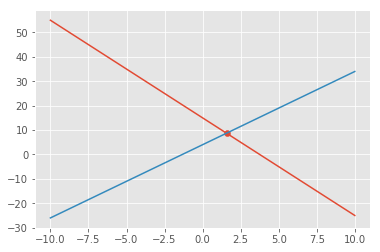

In [14]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(demand, -10, 10)
plot_equation(supply, -10, 10)
plot_intercept(supply, demand);

## Adding Sliders

In [15]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [16]:
nbi.multiple_choice(question="What can cause a rightward shift in the demand curve?",
                    choices=['The enactment of a price ceiling', 'The invention of more efficient manufacturing process', 'A change in consumer preferences'],
                    answers=2)

VBox(children=(HTML(value='<p style="line-height:18px;">What can cause a rightward shift in the demand curve?</p>'), HBox(children=(Button(layout=Layout(height='20px', padding='0', width='20px'), style=ButtonStyle()), HTML(value='<p style="line-height:18px;">The enactment of a price ceiling</p>')), layout=Layout(align_items='center')), HBox(children=(Button(layout=Layout(height='20px', padding='0', width='20px'), style=ButtonStyle()), HTML(value='<p style="line-height:18px;">The invention of more efficient manufacturing process</p>')), layout=Layout(align_items='center')), HBox(children=(Button(layout=Layout(height='20px', padding='0', width='20px'), style=ButtonStyle()), HTML(value='<p style="line-height:18px;">A change in consumer preferences</p>')), layout=Layout(align_items='center'))))

In [17]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [18]:
widgets.IntSlider()

IntSlider(value=0)

In [19]:
# need to move supply to outside of functions (for interchangability)
# add in equilibriums

def shift_demand():
    equation = demand
    def shift_helper(shift):
        plot_equation(equation, -10, 10)
        plot_equation(supply, -10, 10)
        old = plot_intercept(equation, supply)
        print('Original Intercept:', old)
        
        if shift != 0:
            plot_equation(equation + shift, -10, 10, 'shifted')
            new = plot_intercept(equation + shift, supply)
            print('New intercept:', new)
            print('Change in Quantity:', round(float(new[0]-old[0]), 2))
            print('Change in Price:', round(float(new[1]-old[1]), 2))
        else:
            print('Nothing shifted yet, use the slider to move the line!')
        plt.xlim(-10,10)
        plt.ylim(-10,30)
        plt.legend()
    interact(shift_helper, shift=(-12, 12, 3))

shift_demand()

interactive(children=(IntSlider(value=0, description='shift', max=12, min=-12, step=3), Output()), _dom_classes=('widget-interact',))

## Consumer and Producer Surplus

In [20]:
import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
p = sympy.Symbol("p")
def Equilibrium(demandParam, supplyParam, priceStart):
    demandEquation = demandParam - p
    supplyEquation = p * supplyParam
    priceEnd = sympy.solve(demandEquation)[0]
    prices = []
    demandQ = []
    supplyQ = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demandQ += [demandEquation.subs(p,price)]
        supplyQ += [supplyEquation.subs(p,price)]
    
    equilibriumP = sympy.solve(demandEquation-supplyEquation)[0]
    equilibriumQ = demandEquation.subs(p,equilibriumP)
    
    
    
    triangle1 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,priceEnd]],True,color="green")
    triangle2 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,0]],True,color="red")
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    plt.plot(demandQ,prices)
    plt.plot(supplyQ,prices)
    plt.legend(["Demand","Supply"])
    plt.plot(equilibriumQ,equilibriumP, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.show()
    print("The equilibrium price is "+str(equilibriumP)+" and equilibrium quantity is "+str(equilibriumQ)+".")
    print("The consumer surplus at this equilibrium "+str((priceEnd-equilibriumP)*(equilibriumQ)*.5))
    print("The producer surplus at this equilibrium "+str((equilibriumP)*(equilibriumQ)*.5))
slider1 = widgets.IntSlider(min=5, max=15,step=1,value=0)
slider2 = widgets.IntSlider(min=1, max=5,step=1,value=0)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
display(widgets.interactive(Equilibrium, demandParam=slider1, supplyParam=slider2, priceStart=slider3))

interactive(children=(IntSlider(value=5, description='demandParam', max=15, min=5), IntSlider(value=1, description='supplyParam', max=5, min=1), IntSlider(value=0, description='priceStart', max=5, min=-5), Output()), _dom_classes=('widget-interact',))

## Shifts in Intercept

## Effects of Taxes, Tariffs, Floors, and Ceilings

In [21]:
def eqSolve(eq1,eq2,tax):
    demandP = sympy.solve(eq1-q,p)[0]
    supplyP = sympy.solve(eq2-q,p)[0]
    demandP = demandP-cTax
    supplyP = supplyP+pTax

    demandQ = sympy.solve(demandP-p,q)[0]
    supplyQ = sympy.solve(supplyP-p,q)[0]
    
    return sympy.solve((demandP-supplyP, demandQ-supplyQ,tax-cTax-pTax), q,p,cTax,pTax)[q]

In [22]:
import sympy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
p = sympy.Symbol("p")
q = sympy.Symbol("q")
cTax = sympy.Symbol("cTax")
pTax = sympy.Symbol("pTax")

def EquilibriumTax(demandParam,supplyParam,priceStart,priceEnd,tax):
    demandEquation = demandParam - p
    supplyEquation = p * supplyParam
    prices = []
    demand = []
    supply = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demand += [demandEquation.subs(p,price)]
        supply += [supplyEquation.subs(p,price)]
        
    
    
    nonTaxPrice = sympy.solve(demandEquation-supplyEquation)[0]
    nonTaxQ = demandEquation.subs(p,nonTaxPrice)

    
    equilibriumQ = eqSolve(demandEquation,supplyEquation,tax)
    equilibriumP1 = sympy.solve(demandEquation-equilibriumQ)[0]
    equilibriumP2 = sympy.solve(supplyEquation-equilibriumQ)[0]
    
    triangle1 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP1]],True,color="green")
    triangle2 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP2]],True)
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    
    rect1 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP1-nonTaxPrice,linewidth=1,facecolor="red")
    rect2 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP2-nonTaxPrice,linewidth=1,facecolor="yellow")
    currentAxis.add_patch(rect1)
    currentAxis.add_patch(rect2)
    
    plt.plot(demand,prices)
    plt.plot(supply,prices)
    
    
    plt.legend([rect1,rect2,triangle1,triangle2], ["Consumer Tax","Producer Tax","Consumer Deadweight Loss","Producer Deadweight Loss"])
    plt.plot(equilibriumQ,equilibriumP1, 'ro')
    plt.plot(equilibriumQ,equilibriumP2, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.show()
    print("The equilibrium prices are "+str(equilibriumP1)+" and "+str(equilibriumP2)+" and equilibrium quantity is "+str(equilibriumQ)+".")
    print("Taxes raised from consumers equals "+str(equilibriumQ*(equilibriumP1-nonTaxPrice)))
    print("Taxes raised from producers equals "+str(equilibriumQ*(nonTaxPrice-equilibriumP2)))
    print("Total taxes raised equals "+str(equilibriumQ*tax))

slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=1, max=5,step=1,value=3)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
slider4 = widgets.IntSlider(min=5, max=10,step=1,value=5)
slider5 = widgets.IntSlider(min=2, max=8,step=1,value=4)
display(widgets.interactive(EquilibriumTax, demandParam=slider1, supplyParam=slider2, priceStart=slider3, priceEnd=slider4, tax=slider5))

interactive(children=(IntSlider(value=10, description='demandParam', max=15, min=5), IntSlider(value=3, description='supplyParam', max=5, min=1), IntSlider(value=0, description='priceStart', max=5, min=-5), IntSlider(value=5, description='priceEnd', max=10, min=5), IntSlider(value=4, description='tax', max=8, min=2), Output()), _dom_classes=('widget-interact',))

## Shifts in Slope and effect on DWL, etc.